# EJERCICIOS

In [36]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV


In [62]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

Puede que hayamos sobreajustando el modelo y al probarlo con datos nuevos no prediga bien

Podemos arreglarlo de varias maneras:
  - Introducir datos de entrenematiento más variados para que el modelo pueda generalizar mejor 
  - Cambiando el grado del polinomio por uno más pequeño para simplificar el modelo (PolynomialFeatures(degree=))
  - Podemos disminuir la complejidad del modelo usandoregularizaciones como Ridge o Lasso (penalizan por intentar ajustarse de mas)

## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

Lo hemos subajustado y habría que reducirlo 

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [2]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

Muestra los primero datos de X e y

In [64]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [65]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [3]:
df = X.copy()
df['progres'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progres
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Usa .describe y .info para ver un poco de información

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  progres  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [68]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progres
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Representa cada una de la características

C:\Users\elena\AppData\Local\Temp\ipykernel_10896\172215315.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(data=df,x='sex',ax=ax[0]).set_xticklabels(labels=['male','female'])


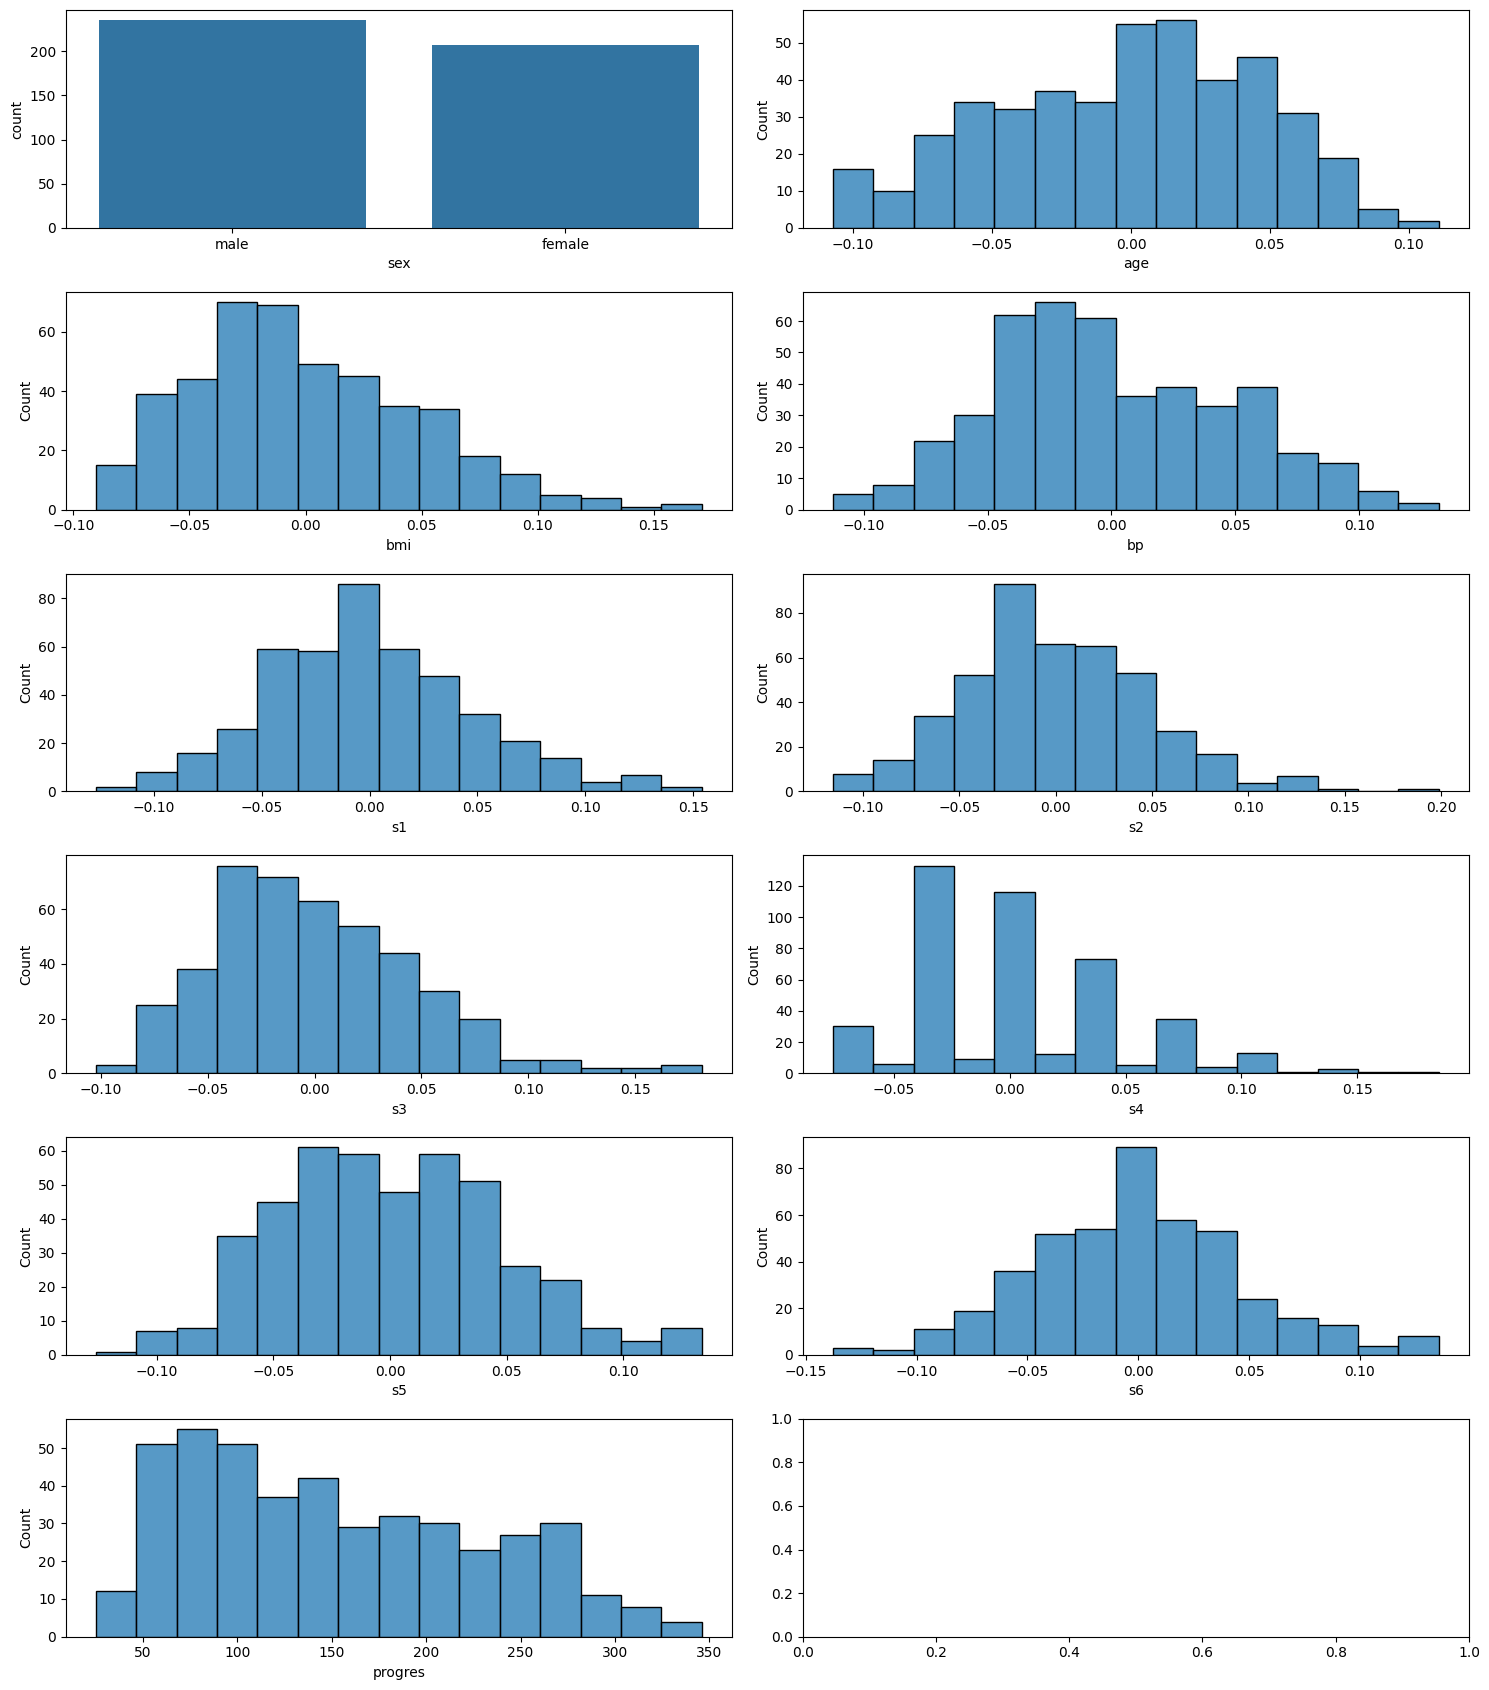

In [69]:
fig,ax = plt.subplots(6,2, figsize=(15,17))
ax = ax.flatten()      
cols_num = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','progres']
sns.countplot(data=df,x='sex',ax=ax[0]).set_xticklabels(labels=['male','female'])
i = 1
for col in cols_num:
    sns.histplot(data=df, x=col, ax=ax[i], bins=15, legend=None)
    #ax[i].set_title(col)
    i+=1

plt.tight_layout()
plt.show()

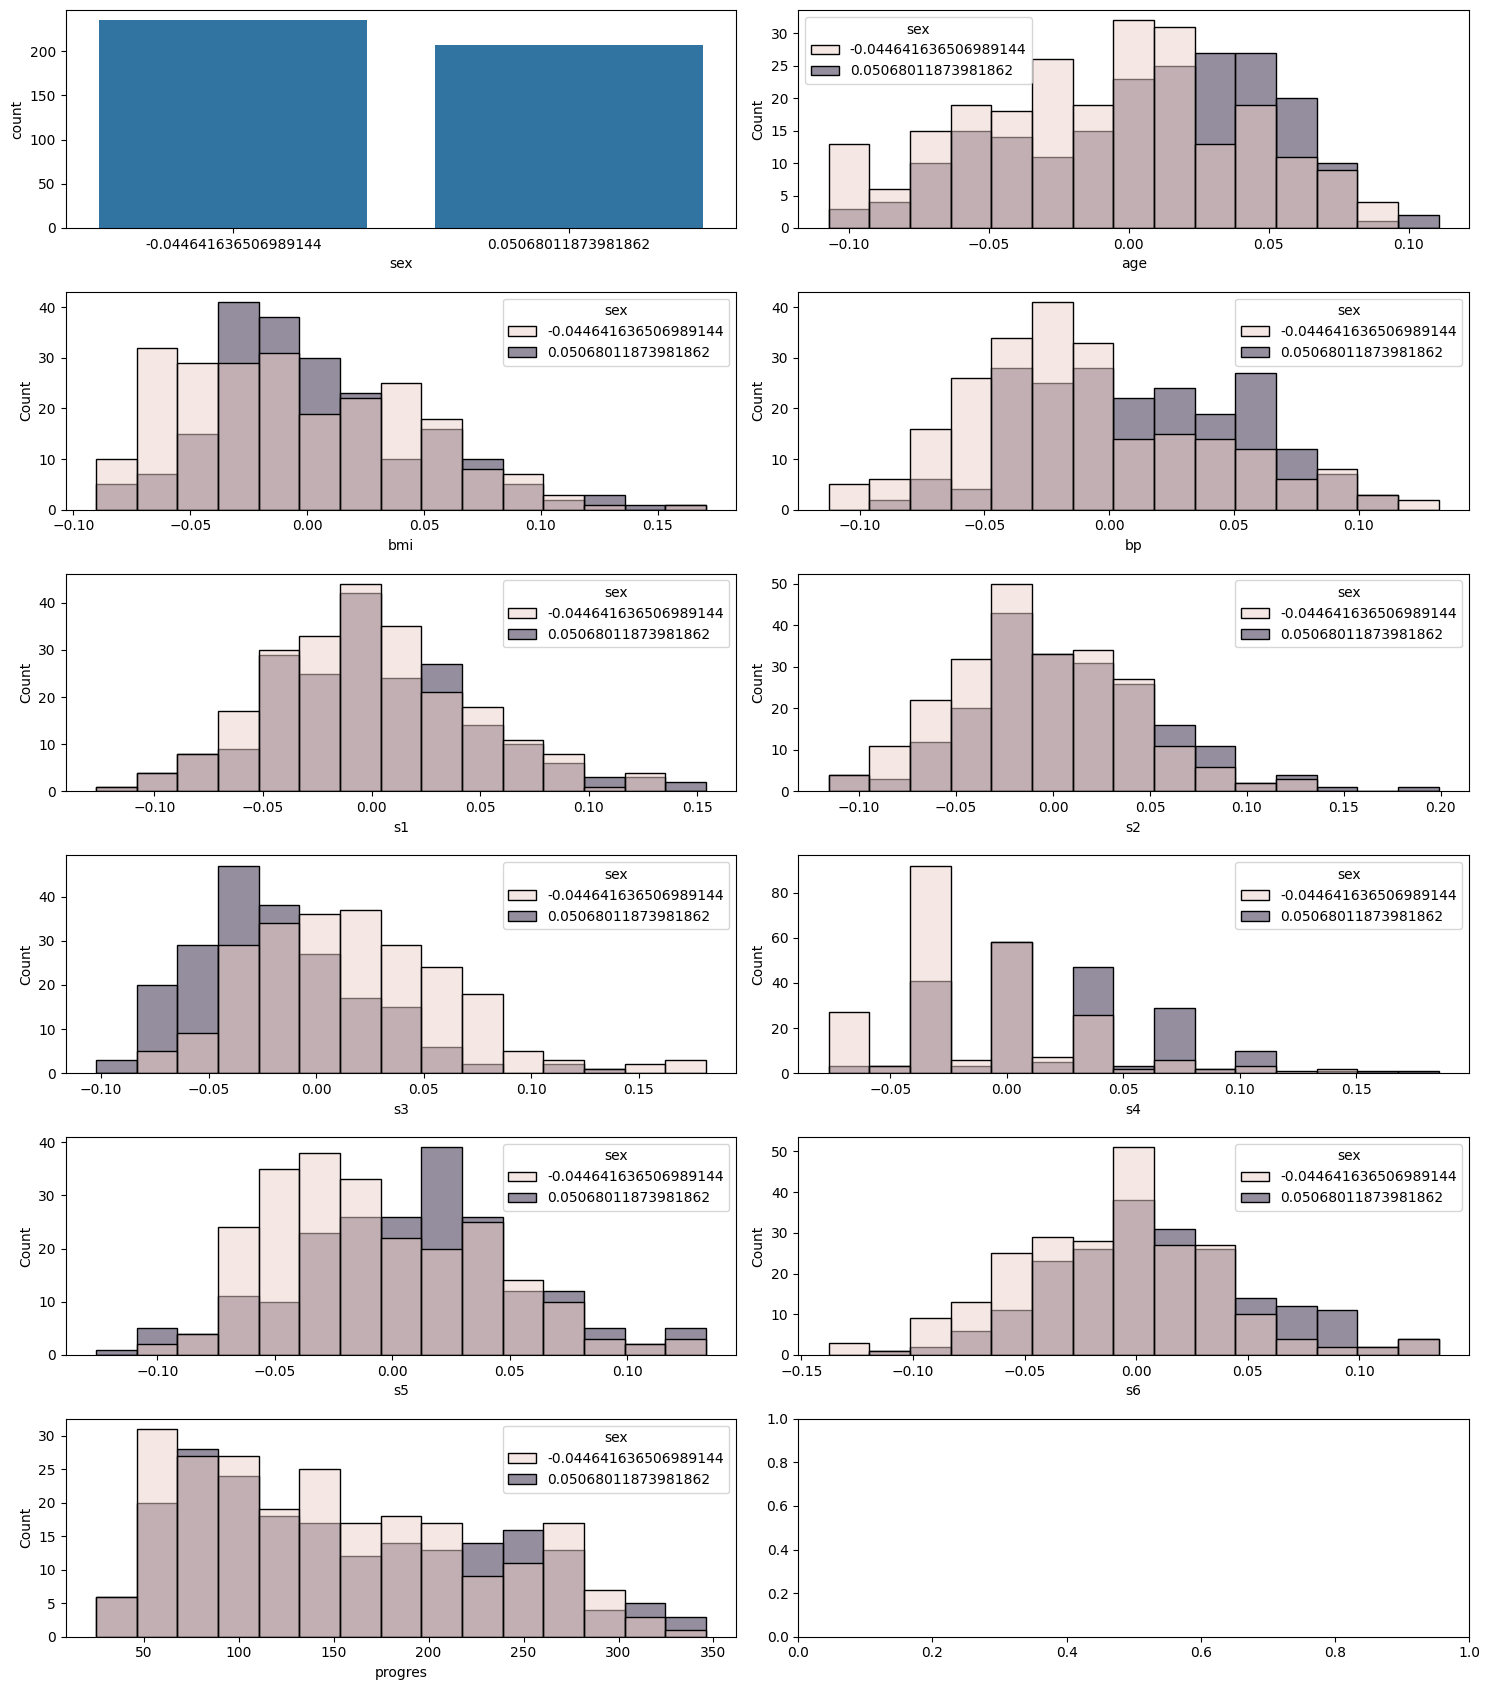

In [70]:
fig,ax = plt.subplots(6,2, figsize=(15,17))
ax = ax.flatten()      
cols_num = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','progres']
sns.countplot(data=df,x='sex',ax=ax[0])#.set_xticklabels(labels=['male','female'])
i = 1
for col in cols_num:
    sns.histplot(data=df, x=col, ax=ax[i], bins=15, hue='sex')
    i+=1

plt.tight_layout()
plt.show()

Muestra la matriz de correlaciones

In [71]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progres
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


#### DIVIDIR LOS DATOS

In [8]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X,y,
                            test_size=0.20, random_state=42,
                            stratify=df['sex'])
train_set_x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
324,0.030811,-0.044642,0.005650,0.011544,0.078236,0.077913,-0.043401,0.108111,0.066051,0.019633
284,0.041708,0.050680,-0.022373,0.028758,-0.066239,-0.045155,-0.061809,-0.002592,0.002861,-0.054925
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
157,-0.001882,0.050680,-0.033151,-0.018306,0.031454,0.042840,-0.013948,0.019917,0.010227,0.027917
35,0.048974,0.050680,-0.030996,-0.049291,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633
...,...,...,...,...,...,...,...,...,...,...
186,-0.081798,0.050680,0.042296,-0.019442,0.039710,0.057558,-0.069172,0.108111,0.047190,-0.038357
247,-0.081798,-0.044642,-0.081653,-0.040099,0.002559,-0.018537,0.070730,-0.039493,-0.010903,-0.092204
52,-0.052738,-0.044642,-0.009439,-0.005670,0.039710,0.044719,0.026550,-0.002592,-0.018114,-0.013504
77,-0.096328,-0.044642,-0.036385,-0.074527,-0.038720,-0.027618,0.015505,-0.039493,-0.074093,-0.001078


#### PREPARAR LOS DATOS

In [31]:
cols = X.drop('sex', axis=1).columns
# pipelines
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'), 
    StandardScaler())
sex_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler()
)

# megapipeline
pipeline = ColumnTransformer([
     ('sex', sex_pipeline, ['sex']),
     ('num', num_pipeline, cols)
 ],
 verbose_feature_names_out=False
)



### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

In [ ]:
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Random forest': RandomForestRegressor(n_estimators=5, random_state=42),
    'Regresión Logística': LogisticRegression(random_state=42, max_iter=650),
    'Ridge':Ridge(),
    'Lasso':Lasso()
}

for key, modelo in modelos.items():

    pipe = make_pipeline(pipeline,modelo)    
    y_pred = cross_val_predict(pipe, train_set_x, train_set_y, cv=5)    
    rmse = np.sqrt(mean_squared_error(train_set_y, y_pred))
    print('RMSE {}: {}'.format(key,rmse))

RMSE Regresión Lineal: 54.51446578633823
RMSE Random forest: 62.04673373465206


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RMSE Regresión Logística: 76.92826208281423
RMSE Ridge: 54.5185279331503
RMSE Lasso: 54.76081793895125


Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

In [ ]:
y_max = np.max(y)
y_min = np.min(y)
print('Max: {} \nMin: {}'.format(y_max,y_min))

Max: 346.0 
Min: 25.0
Total: 321.0


### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

In [37]:
# Creamos la pipeline
fullpipeline = make_pipeline(pipeline,Ridge())

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=fullpipeline,
    param_distributions={'ridge__alpha': [0.1, 1, 10, 100,200]},
    n_iter=100,  
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(train_set_x, train_set_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Mejores hiperparámetros: {'ridge__alpha': 0.1}


Evalúa este mejor modelo en el conjunto de pruebas

In [38]:
final_model = random_search.best_estimator_
y_pred = cross_val_predict(final_model, test_set_x, test_set_y, cv=5)

rmse = np.sqrt(mean_squared_error(test_set_y, y_pred))
print('RMSE: ',rmse)

RMSE:  56.47339266394927


### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [ ]:
joblib.dump(final_model, "./2_11_E3_Elena.pkl")

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [41]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

In [ ]:
print(type(X),' <--X  type  y--> ',type(y))

In [42]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [44]:
y.unique()

array([0, 1, 2])

In [54]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [51]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Representa la matriz de correlaciones

In [46]:
df = X.copy()
df['tipo'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\elena\AppData\Local\Temp\ipykernel_10032\3274327002.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.countplot(data=df,x='tipo',ax=ax[i]).set_xticklabels(labels=['Tipo_1','Tipo_2','Tipo_3'])


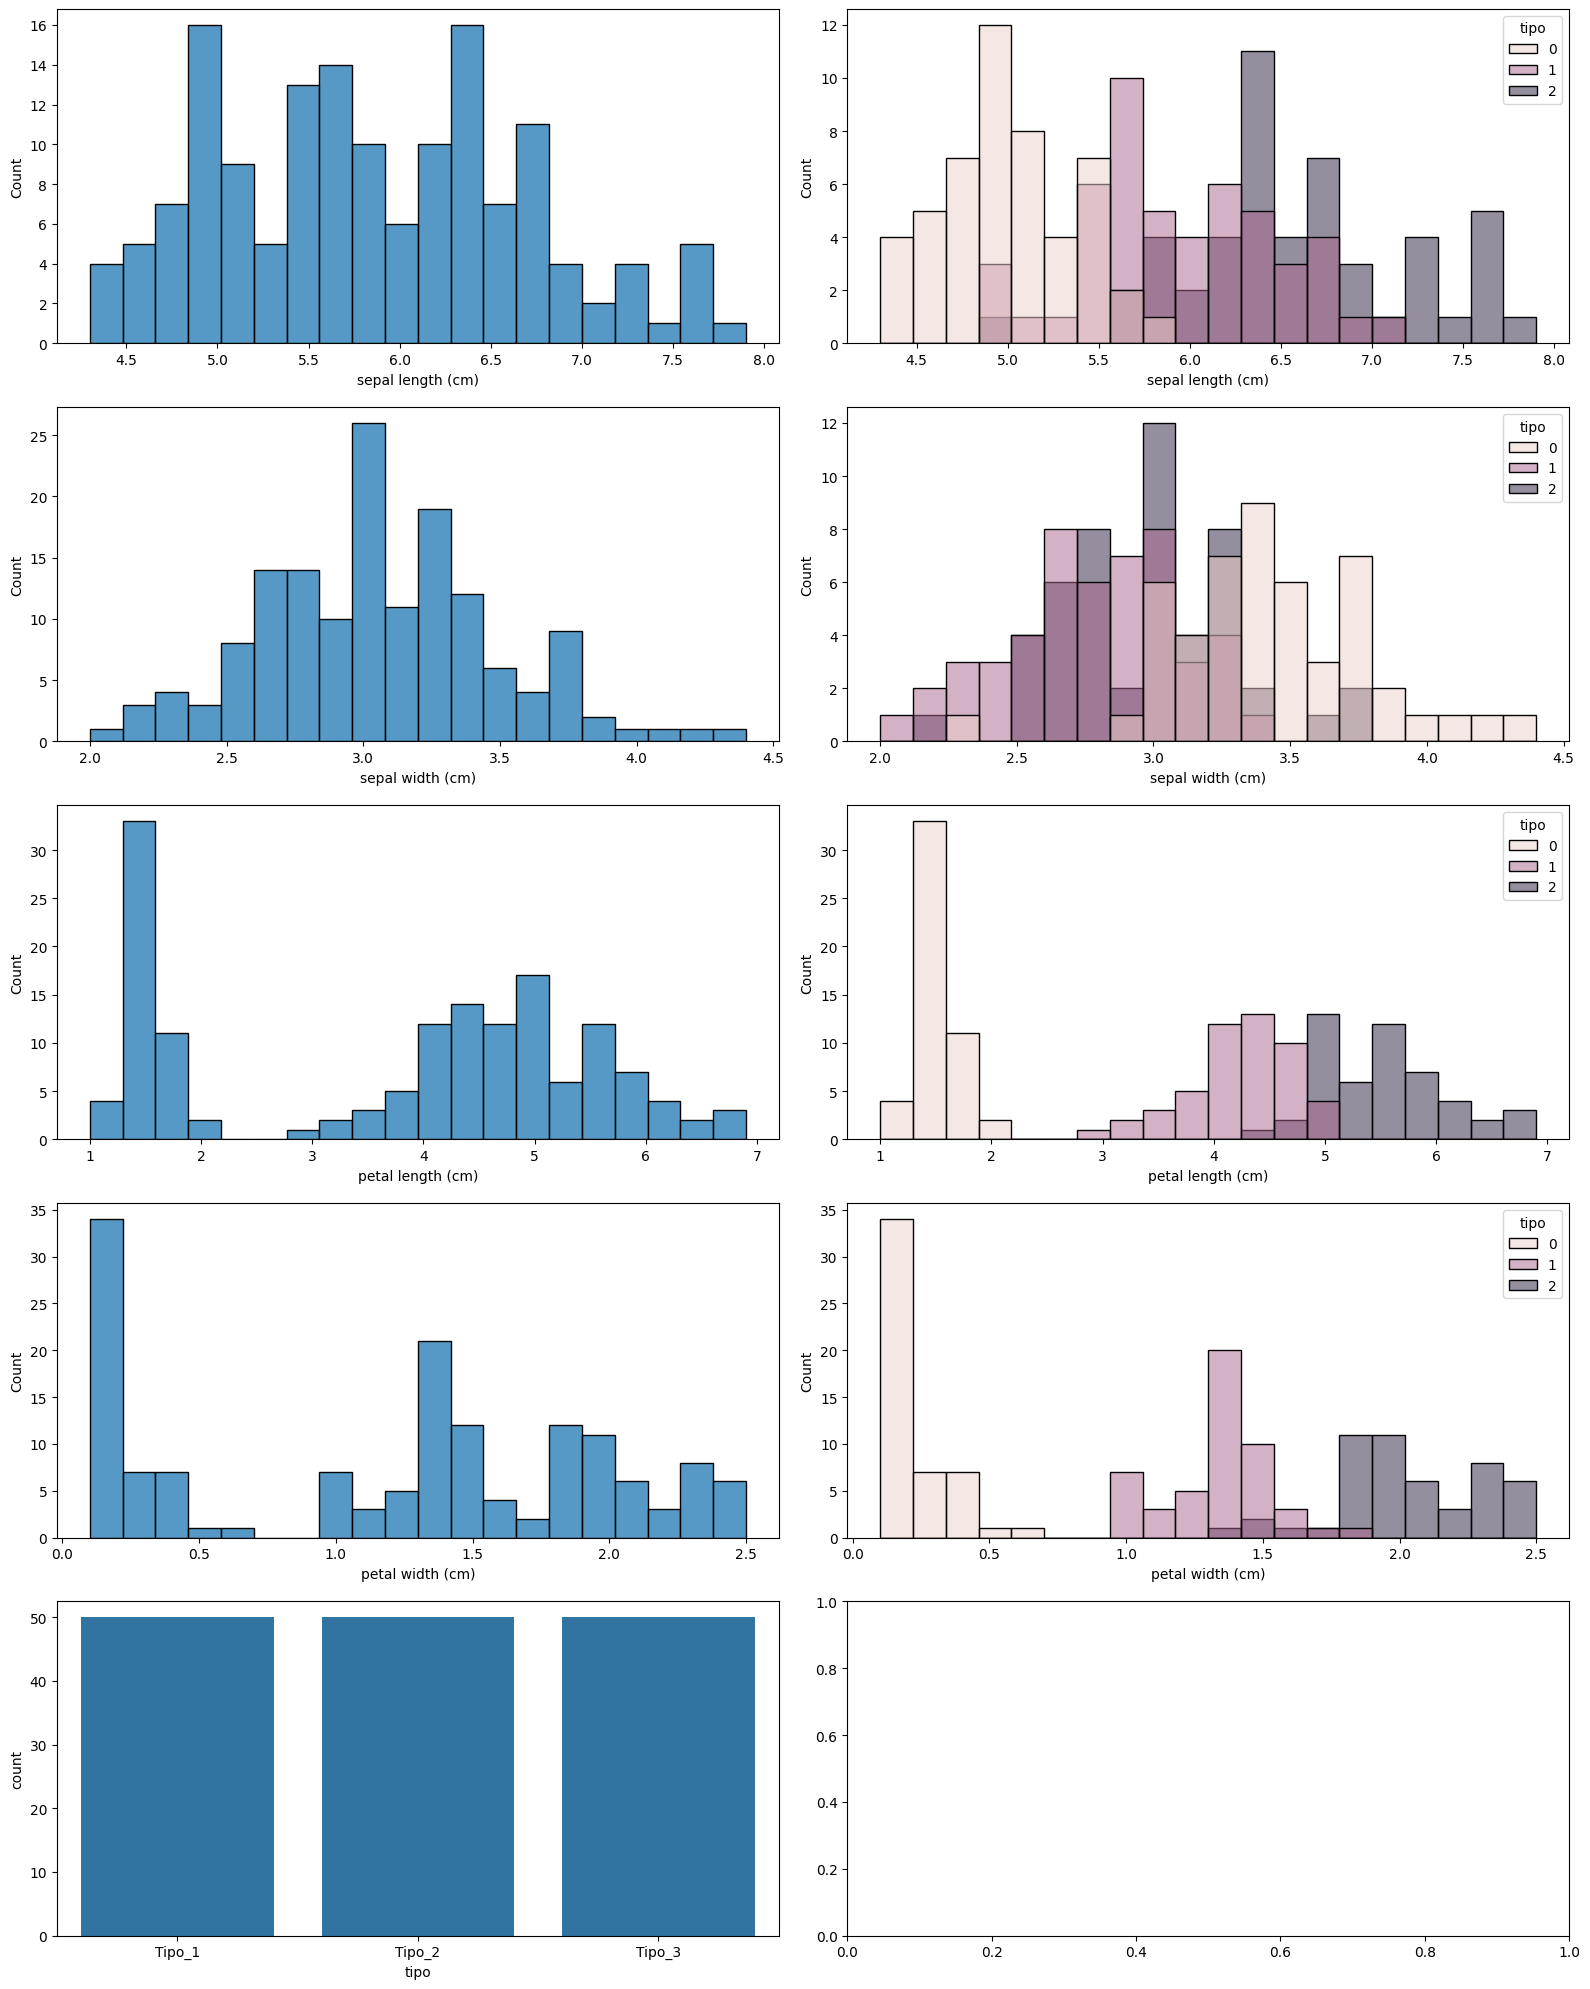

In [62]:
fig, ax = plt.subplots(5, 2, figsize=(16, 20))
ax = ax.flatten()
cols_disc = df.select_dtypes(include=['float64'])
i = 0
for col in cols_disc.columns:
    sns.histplot(data=df, x=col, ax=ax[i], bins=20, legend=None)
    i+=1
    sns.histplot(data=df, x=col, ax=ax[i], bins=20, hue='tipo')
    i+=1
sns.countplot(data=df,x='tipo',ax=ax[i]).set_xticklabels(labels=['Tipo_1','Tipo_2','Tipo_3'])
# Para que no se me junten
plt.tight_layout()
plt.show()

In [49]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix['tipo'].sort_values(ascending=False))
corr_matrix.style.background_gradient()

tipo                 1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: tipo, dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
tipo,0.782561,-0.426658,0.949035,0.956547,1.000000


#### DIVIDIR LOS DATOS

In [63]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(X,y,
                            test_size=0.15, random_state=42,
                            stratify=y)

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

In [68]:
pipeline = make_pipeline(StandardScaler(),LogisticRegression())
pipeline.fit(train_set_x, train_set_y)

train_y_predict = cross_val_predict(pipeline, train_set_x, train_set_y, cv=5)
exactitud = accuracy_score(train_set_y, train_y_predict)

print('Exactitud: ',exactitud)

Exactitud:  0.9606299212598425


Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

 Exactitud: 0.9606299212598425
 Precision: 0.9604840234448856
 Sensibilidad: 0.9603174603174603
 F1: 0.9603118355776045


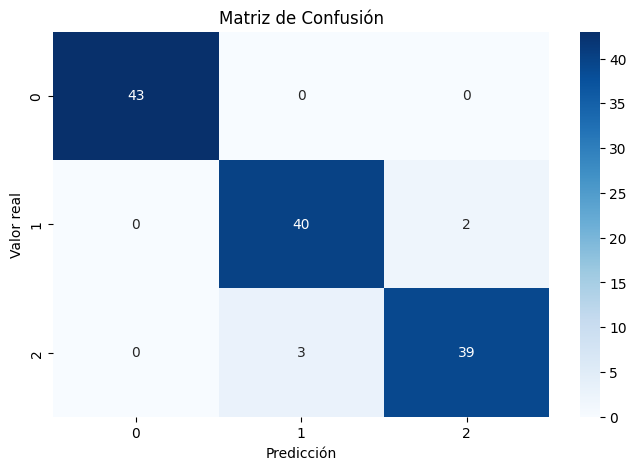

In [69]:
matriz = confusion_matrix(train_set_y,train_y_predict)

exactitud = accuracy_score(train_set_y, train_y_predict)
precision = precision_score(train_set_y, train_y_predict, average='macro')
sensibilidad = recall_score(train_set_y, train_y_predict, average='macro')
f1 = f1_score(train_set_y, train_y_predict, average='macro')

print(' Exactitud: {}\n Precision: {}\n Sensibilidad: {}\n F1: {}'.format(exactitud,precision,sensibilidad,f1))

plt.figure(figsize=(8, 5))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

¿Qué podemos deducir?

Funciona bien. Parece que solo ha fallado 5 de 122 y ha sido entre los tipos 1 y 2 que por lo visto en las graficas se parecen más

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

In [ ]:
params = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'logisticregression__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_set_x, train_set_y)

print("Mejores hiperparámetros:", grid_search.best_params_)

final_model = grid_search.best_estimator_

Mejores hiperparámetros: {'logisticregression__C': 10.0, 'logisticregression__solver': 'saga'}


c:\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

 Exactitud: 0.9565217391304348
 Precision: 0.9629629629629629
 Sensibilidad: 0.9603174603174603
 F1: 0.9581699346405229


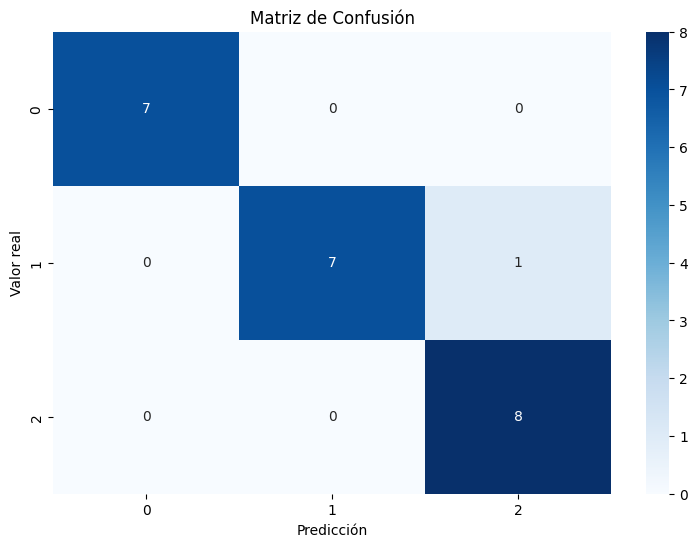

In [71]:
y_test_predict = final_model.predict(test_set_x)

matriz_confusion = confusion_matrix(test_set_y, y_test_predict)

exactitud = accuracy_score(test_set_y, y_test_predict)
precision = precision_score(test_set_y, y_test_predict, average='macro')  
recall = recall_score(test_set_y, y_test_predict, average='macro')  
f1 = f1_score(test_set_y, y_test_predict, average='macro') 

print(' Exactitud: {}\n Precision: {}\n Sensibilidad: {}\n F1: {}'.format(exactitud,precision,sensibilidad,f1))

plt.figure(figsize=(9, 6)) 
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

In [ ]:
joblib.dump(final_model, "./2_11_E4_Elena.pkl")

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset